# Guided Capstone Step 3 Exploratory Data Analysis

This is the third step in the Data Science Method. We introduced this topic in the last subunit. With Data Wrangling out of the way we can progress to the Exploratory Data Analysis section. 
  
**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  * Data Collection 
   * Data Organization
  * Data Definition 
  * Data Cleaning
 
3.   **Exploratory Data Analysis** 
 * Build data profile tables and plots
        - Outliers & Anomalies
 * Explore data relationships
 * Identification and creation of features

4.   Pre-processing and Training Data Development
  * Create dummy or indicator features for categorical variables
  * Standardize the magnitude of numeric features
  * Split into testing and training datasets
  * Apply scaler to the testing set
5.   Modeling 
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

**<font color='teal'> Start by loading the necessary packages as we did in step 2 and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
os.getcwd()

'/Users/justin/Desktop/GuidedCapstone-master-2/notebooks'

**<font color='teal'> If you need to change your path refer back to step 2 on how to do that. Then load the csv file you created in step 2, remember it should be saved inside your data subfolder and print the first five rows.</font>**

In [5]:
path="/Users/justin/Desktop/GuidedCapstone-master-2/data/data"
os.chdir(path) 
os.getcwd()

'/Users/justin/Desktop/GuidedCapstone-master-2/Data/data'

In [124]:
df = pd.read_csv('step2_output.csv')

In [125]:
#need to check for nans
#bunch of students said they have trouble at the last step with NaNs
df.isnull().sum()

Name                 0
Region               0
state                0
summit_elev          0
vertical_drop        0
base_elev            0
trams                0
fastEight            0
fastSixes            0
fastQuads            0
quad                 0
triple               0
double               0
surface              0
total_chairs         0
Runs                 0
TerrainParks         0
LongestRun_mi        0
SkiableTerrain_ac    0
Snow Making_ac       0
daysOpenLastYear     0
yearsOpen            0
averageSnowfall      0
AdultWeekday         0
AdultWeekend         0
projectedDaysOpen    0
NightSkiing_ac       0
dtype: int64

# Build data profile tables and plots 

**<font color='teal'> Print out the summary stats table transposed to fit on the screen using the `describe()` function.</font>**

In [126]:
df.describe().T

count         mean          std    min      25%  \
summit_elev        330.0  4591.818182  3735.535934  315.0  1403.75   
vertical_drop      330.0  1215.427273   947.864557   60.0   461.25   
base_elev          330.0  3374.000000  3117.121621   70.0   869.00   
trams              330.0     0.172727     0.559946    0.0     0.00   
fastEight          330.0     0.003030     0.055048    0.0     0.00   
fastSixes          330.0     0.184848     0.651685    0.0     0.00   
fastQuads          330.0     1.018182     2.198294    0.0     0.00   
quad               330.0     0.933333     1.312245    0.0     0.00   
triple             330.0     1.500000     1.619130    0.0     0.00   
double             330.0     1.833333     1.815028    0.0     1.00   
surface            330.0     2.621212     2.059636    0.0     1.00   
total_chairs       330.0     8.266667     5.798683    0.0     5.00   
Runs               330.0    48.214724    46.081366    3.0    19.00   
TerrainParks       330.0     2.384848     2.109556    0.0     1.00   
LongestRun_mi      330.0     1.433231     1.147352    0.0     0.60   
SkiableTerrain_ac  330.0   739.801223  1807.868079    8.0    85.00   
Snow Making_ac     330.0   150.496970   249.854380    0.0    30.00   
daysOpenLastYear   330.0   115.103943    32.231212    3.0   100.00   
yearsOpen          330.0    63.656535   109.263494    6.0    50.00   
averageSnowfall    330.0   185.316456   133.424094   18.0    71.25   
AdultWeekday       330.0    57.916957    23.898798   15.0    43.00   
AdultWeekend       330.0    64.166810    22.571324   17.0    49.00   
projectedDaysOpen  330.0   120.053004    28.742976   30.0   101.25   
NightSkiing_ac     330.0    56.890909    93.464882    0.0     0.00   

                           50%          75%      max  
summit_elev        3127.500000  7806.000000  13487.0  
vertical_drop       964.500000  1800.000000   4425.0  
base_elev          1561.500000  6325.250000  10800.0  
trams                 0.000000     0.000000      4.0  
fastEight             0.000000     0.000000      1.0  
fastSixes             0.000000     0.000000      6.0  
fastQuads             0.000000     1.000000     15.0  
quad                  0.000000     1.000000      8.0  
triple                1.000000     2.000000      8.0  
double                1.000000     3.000000     14.0  
surface               2.000000     3.000000     15.0  
total_chairs          7.000000    10.000000     41.0  
Runs                 34.000000    60.000000    341.0  
TerrainParks          2.000000     3.000000     14.0  
LongestRun_mi         1.000000     2.000000      6.0  
SkiableTerrain_ac   200.000000   739.801223  26819.0  
Snow Making_ac       86.000000   192.000000   3379.0  
daysOpenLastYear    115.103943   130.000000    305.0  
yearsOpen            58.000000    68.750000   2019.0  
averageSnowfall     158.000000   278.750000    669.0  
AdultWeekday         57.916957    67.000000    179.0  
AdultWeekend         64.166810    72.000000    179.0  
projectedDaysOpen   120.053004   136.000000    305.0  
NightSkiing_ac       27.000000    83.750000    650.0

In [127]:
print(df.dtypes)
#name,region and state are categorical 

Name                  object
Region                object
state                 object
summit_elev            int64
vertical_drop          int64
base_elev              int64
trams                  int64
fastEight            float64
fastSixes              int64
fastQuads              int64
quad                   int64
triple                 int64
double                 int64
surface                int64
total_chairs           int64
Runs                 float64
TerrainParks         float64
LongestRun_mi        float64
SkiableTerrain_ac    float64
Snow Making_ac       float64
daysOpenLastYear     float64
yearsOpen            float64
averageSnowfall      float64
AdultWeekday         float64
AdultWeekend         float64
projectedDaysOpen    float64
NightSkiing_ac       float64
dtype: object


**<font color='teal'> Histograms are an excellent way to review the range and density of values for each numeric features in your data set and build data profiles. Plot the histograms for all numeric features and adjust the bins size to 25.</font>**

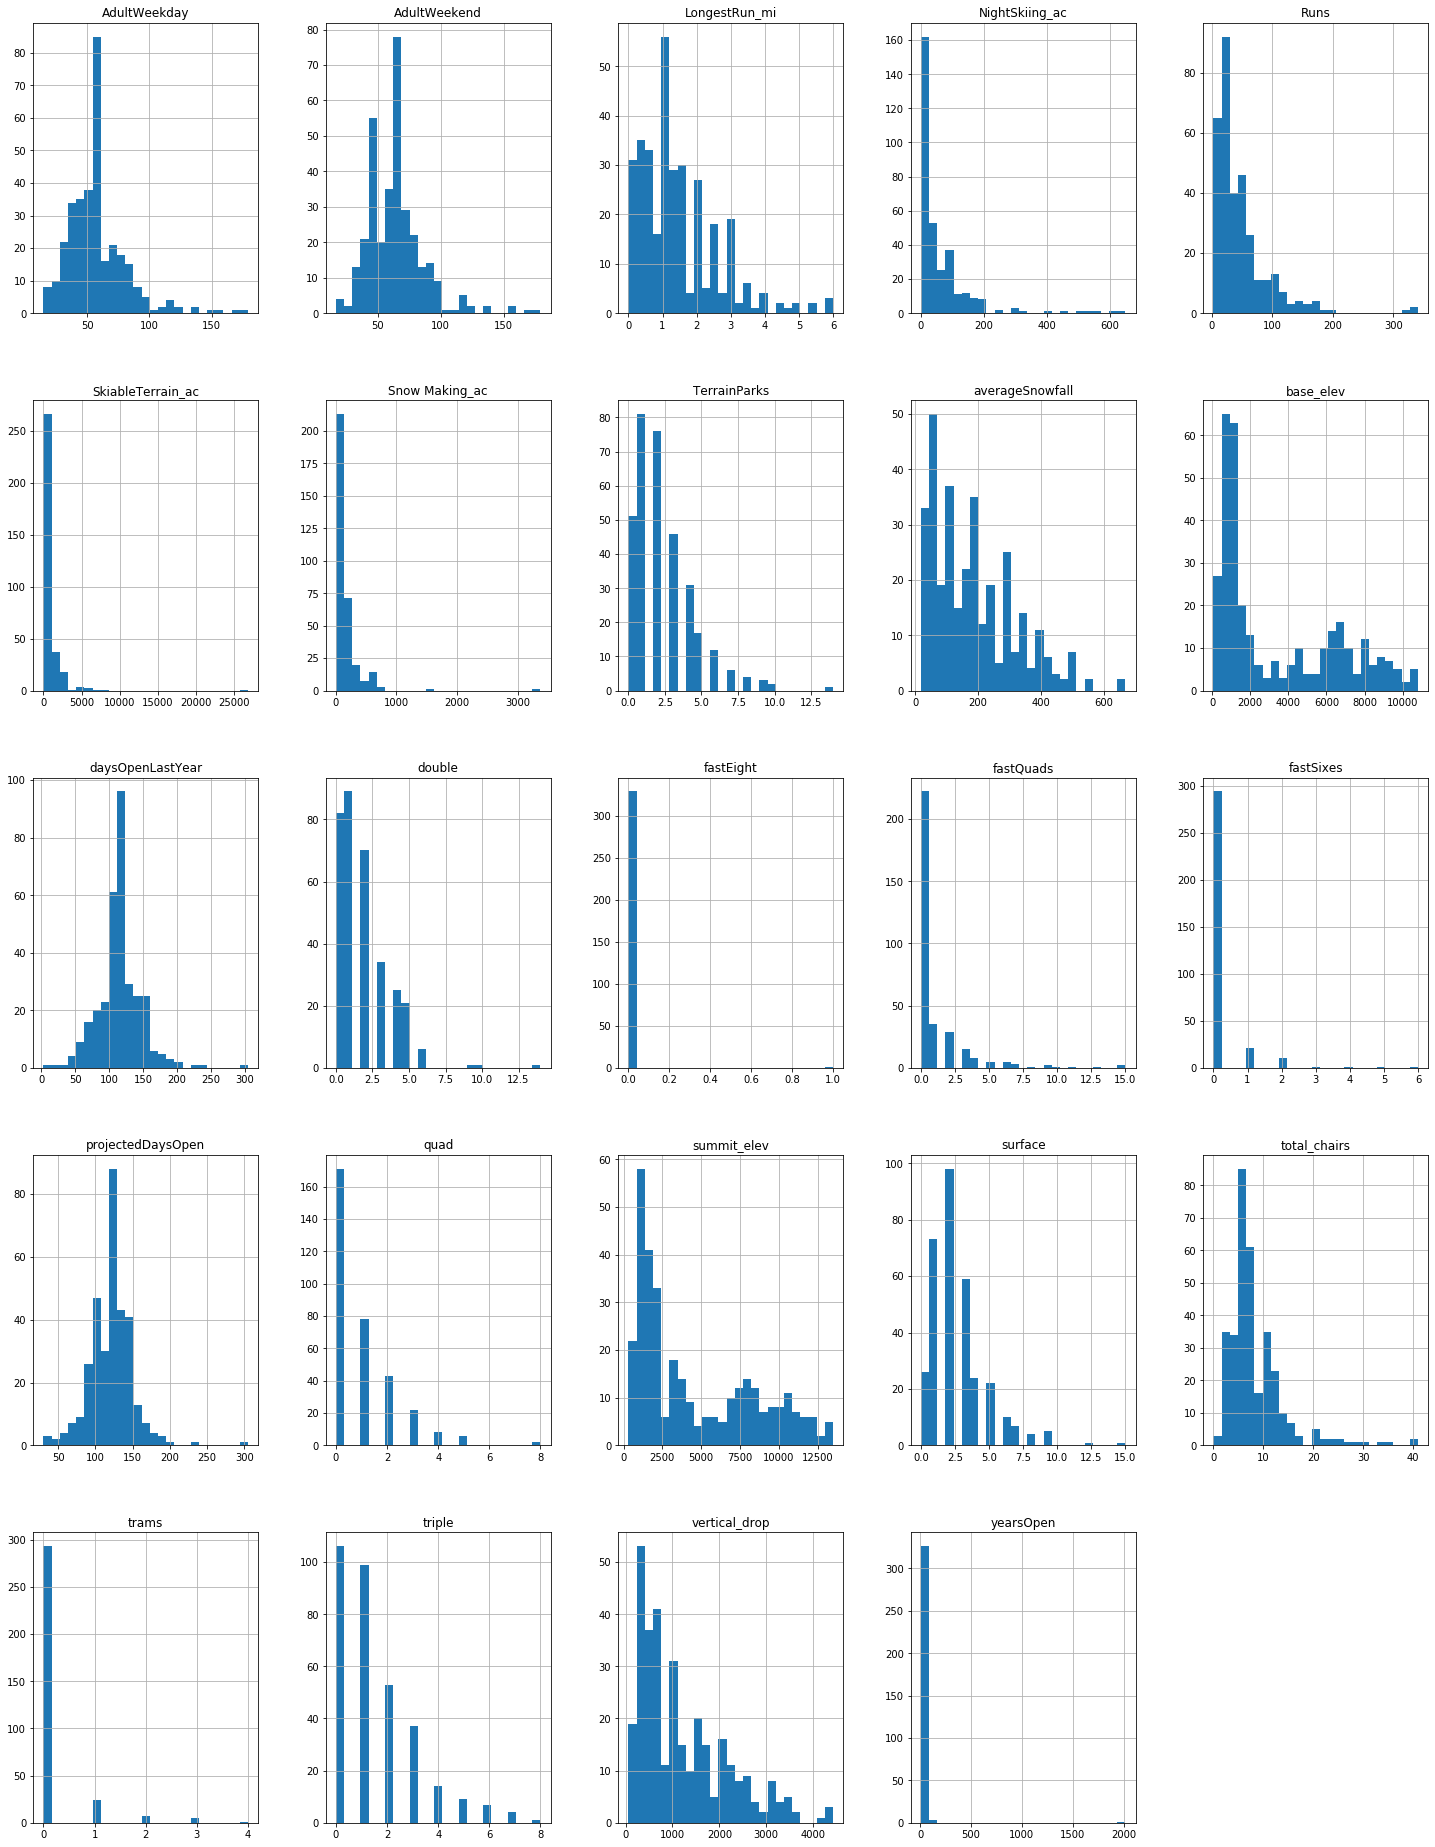

In [128]:
#https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.figure.html
df.loc[:,'summit_elev':].hist(bins = 25,figsize =(25,25))
plt.subplots_adjust(bottom=2, top = 3)
plt.show() 

Look for similarities in the features that may indicate that they are duplicates or highly correlated features. Make a note of your findings and any other interesting insights you find about these numeric features.

**<font color='teal'> Okay, now you should be getting a sense for what the data look like. Let's create a barplot for the categorical features `Region` and `state` where the heights of the bars are the counts of each level in that variable. </font>**

**<font color='teal'>State Levels Plot</font>**

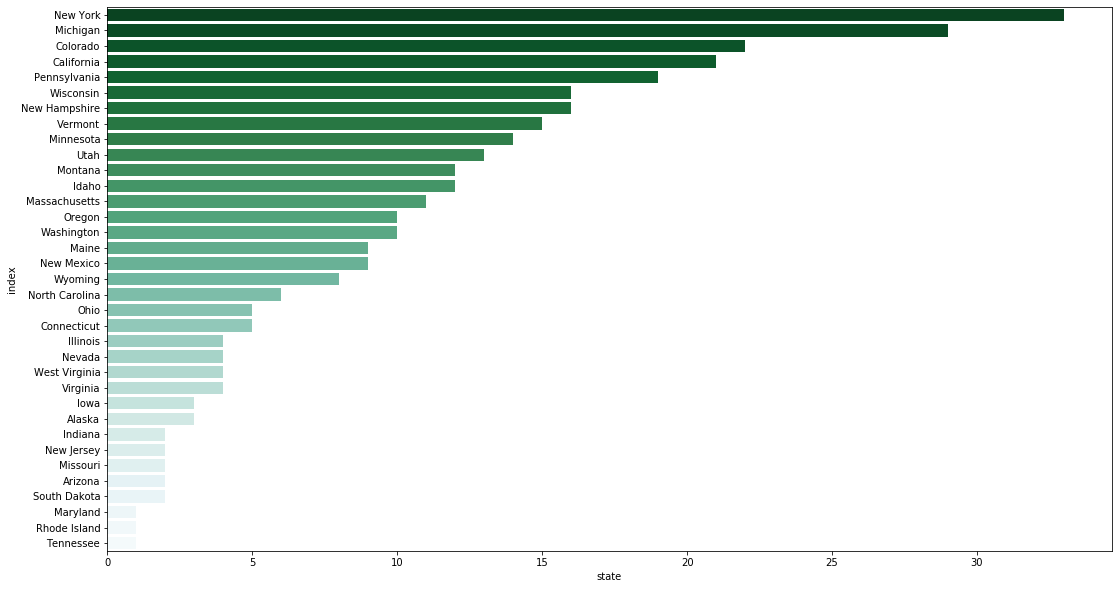

In [129]:
#https://seaborn.pydata.org/generated/seaborn.barplot.html
#https://stackoverflow.com/questions/43562577/horizontal-barplot-in-seaborn-using-dataframe
#https://seaborn.pydata.org/tutorial/color_palettes.html
#Should indicate that you want the student to use seaborn here to make a box plot
#and to have it horizontal 
state_count = pd.DataFrame(df.state.value_counts()).reset_index()
ax = sns.barplot(x = 'state', y = 'index', data = state_count, palette = "BuGn_r")
ax.set_xlabel('state')
plt.show()

**<font color='teal'>Region Levels Plot</font>**

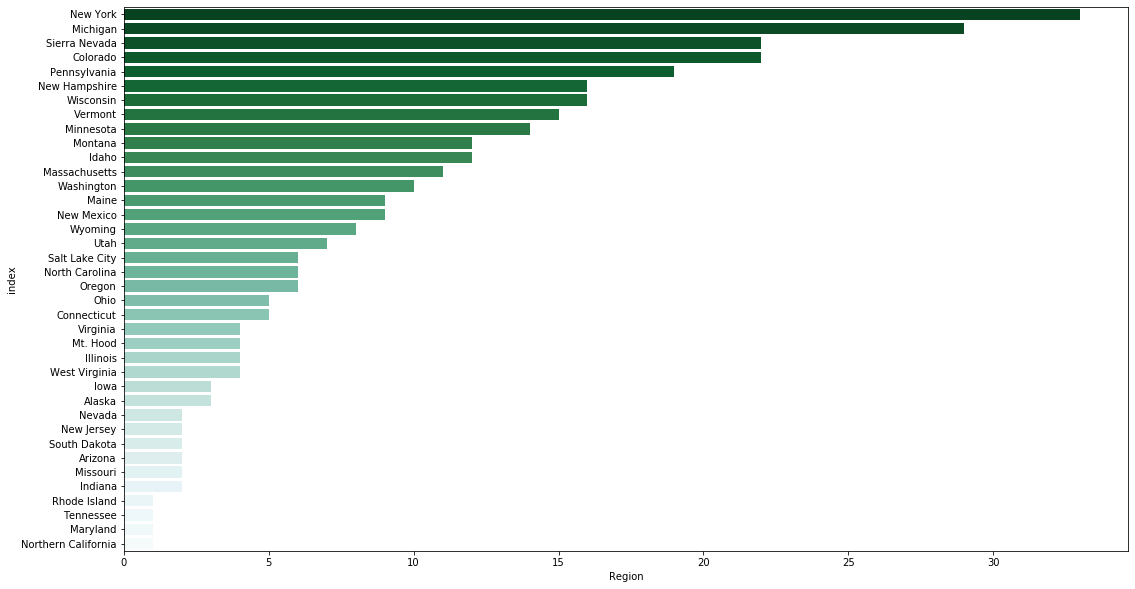

In [130]:
region_count = pd.DataFrame(df.Region.value_counts()).reset_index()
ax = sns.barplot(x = 'Region', y = 'index', data = region_count, palette = "BuGn_r")
ax.set_xlabel('Region')
plt.show()

By reviewing the State and Regions counts plots you should notice that the Region feature is nearly identical to the state and therfore we can remove from the dataframe.**<font color='teal'> Remove the `Region` column using the drop function.</font>**

In [131]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
#change the dataframe here to df2 in case of messing up next steps
df2 = df.drop(columns = 'Region')

## Anamolies & Outliers - Review boxplots

**<font color='teal'> Print boxplot for every column</font>**

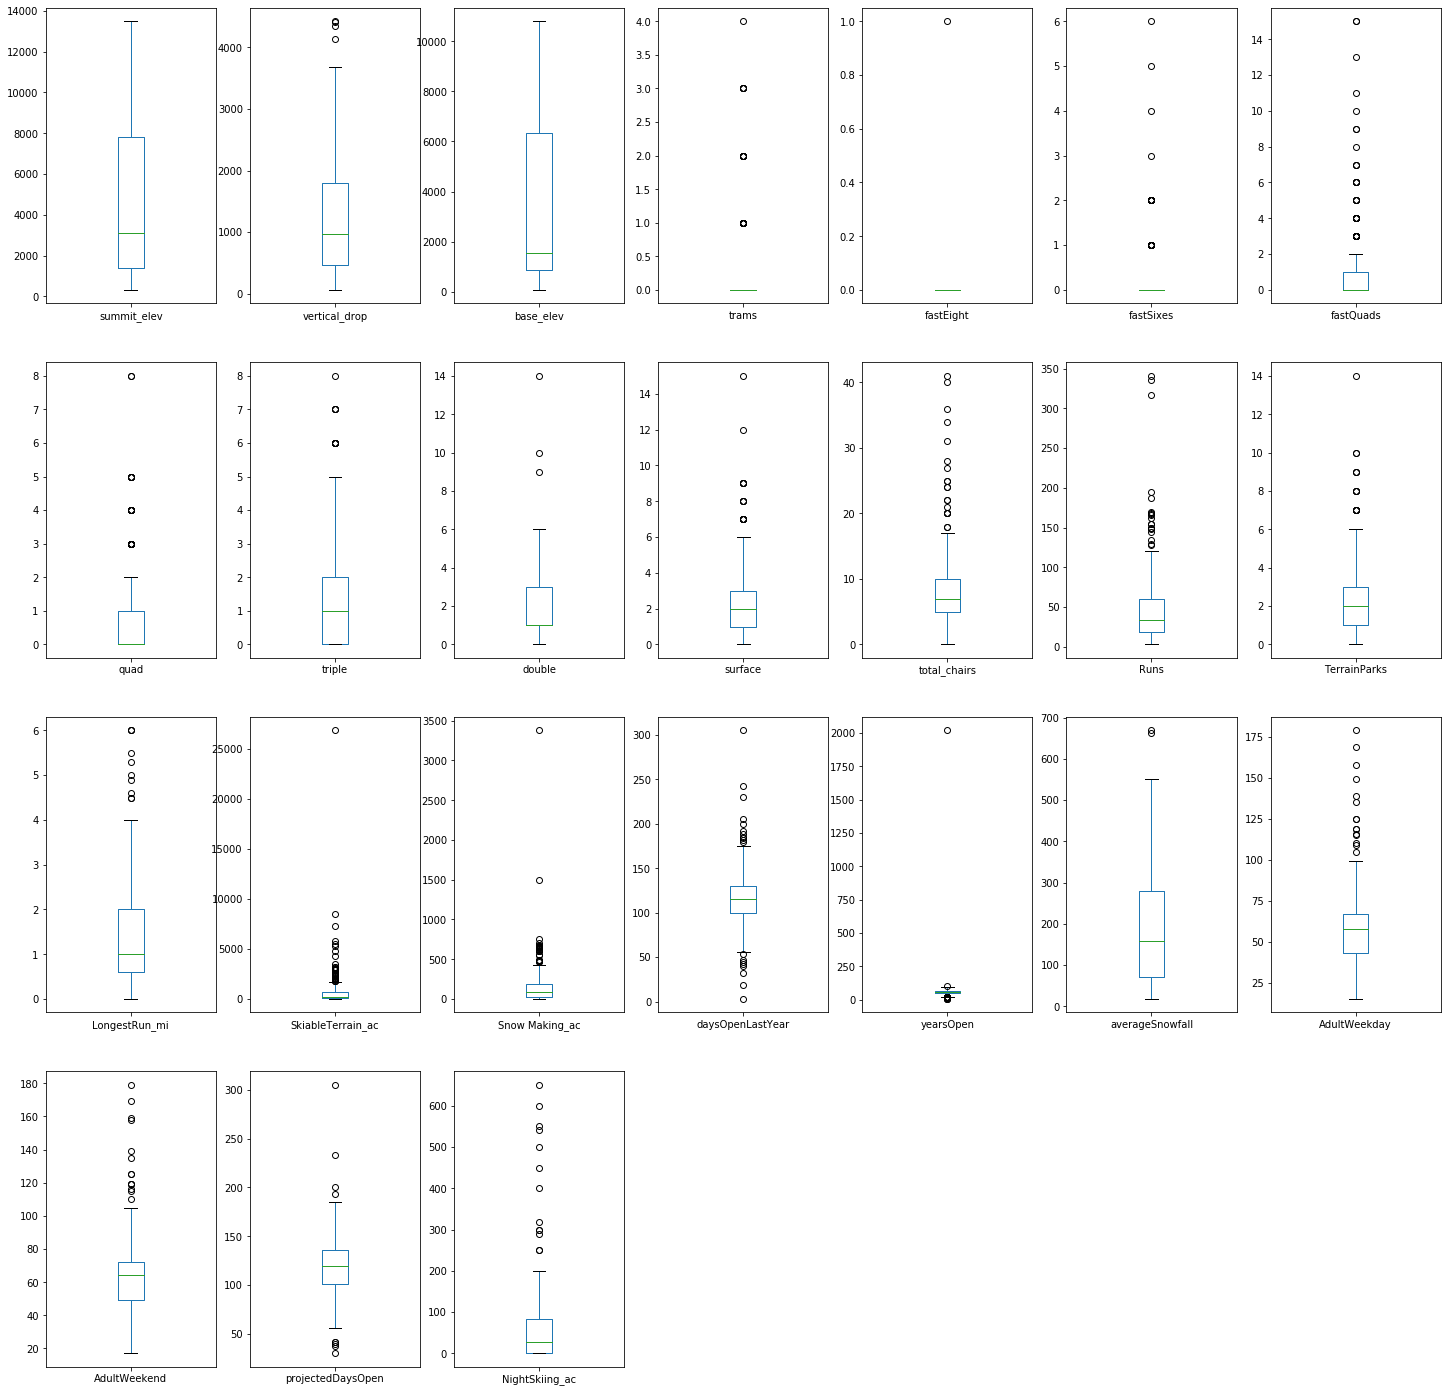

In [132]:
#https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.boxplot.html
df2.plot(kind='box', subplots=True, layout=(4,7), sharex=False, 
          sharey=False, figsize =(25,25)) 
plt.show()

You need to create boxplots and  histograms to evaluate the data for potential outliers or data anomalies. Generally, outliers are defined as observations that differ significantly from the other values in the dataset or feature. 

Reviewing the distribution of values by column will help you  interpret this. Outliers are extreme values that fall far outside the mean and standard deviation of a set of observations. They  can mislead the training process in building machine learning models. Outliers may be real anomalies in the observations or artificial errors. 

One method for outlier analysis is extreme value analysis using a boxplot, which assumes a normal distribution. The figure below describes the components of a boxplot. Notice the outlier is the point outside the upper whisker end. 

![](AnnotatedBoxplot.png)  
<font color='teal'>**Follow these steps:  

1. Create boxplots - earlier step
2. Apply outlier removal using the Interquartile range or replacement 
3. Review how many observations were removed**</font>

In [133]:
#https://www.quora.com/Why-would-you-not-remove-outliers-from-a-data-set

In [134]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [135]:
IQR

summit_elev          6402.250000
vertical_drop        1338.750000
base_elev            5456.250000
trams                   0.000000
fastEight               0.000000
fastSixes               0.000000
fastQuads               1.000000
quad                    1.000000
triple                  2.000000
double                  2.000000
surface                 2.000000
total_chairs            5.000000
Runs                   41.000000
TerrainParks            2.000000
LongestRun_mi           1.400000
SkiableTerrain_ac     654.801223
Snow Making_ac        162.000000
daysOpenLastYear       30.000000
yearsOpen              18.750000
averageSnowfall       207.500000
AdultWeekday           24.000000
AdultWeekend           23.000000
projectedDaysOpen      34.750000
NightSkiing_ac         83.750000
dtype: float64

In [136]:
#should state to set it equal to dfno or dataframe number of observations?
#https://stackoverflow.com/questions/17071871/how-to-select-rows-from-a-dataframe-based-on-column-values
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.any.html
#https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/identifying-outliers-iqr-rule
dfno = df2[~((df2 < (Q1 - 1.5 * IQR)) |(df2> (Q3 + 1.5 * IQR))).any(axis=1)]
df2.shape

(330, 26)

In [137]:
#Step to look at the shape so 330 down to 179 
dfno.shape

(176, 26)

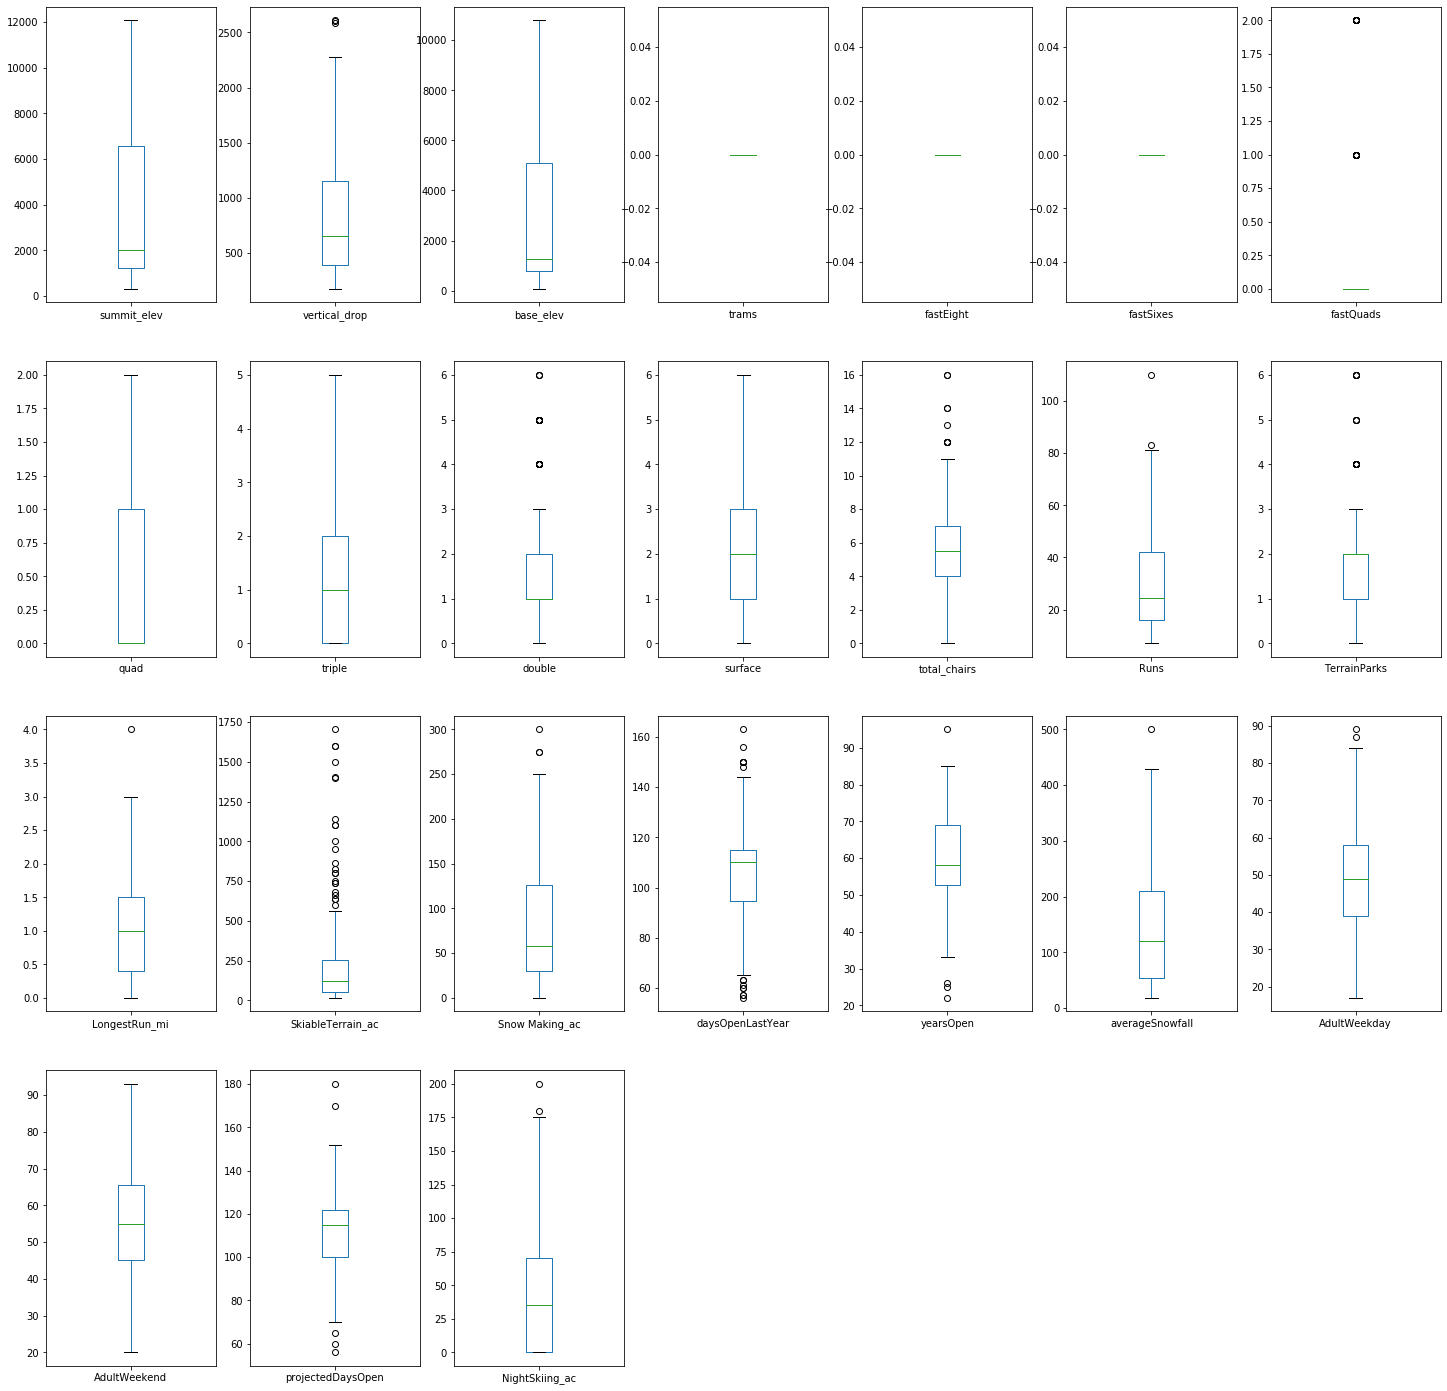

In [138]:
#Boxplot again 
dfno.plot(kind='box', subplots=True, layout=(4,7), sharex=False, 
          sharey=False, figsize =(25,25)) 
plt.show()

There are many possible response variables you could have identified in the Step 1 guided capstone exercise. However, for the rest of this guided capstone project we **will focus on increasing revenue by increasing the lift ticket prices and the number of days the resort is open per year.** 

In this case, we need to investigate the expected lift ticket price for Big Mountain based on all the other given resort characteristics. In addition, we want to predict the number of days open each season.

In [81]:
#https://www.khanacademy.org/math/ap-statistics/quantitative-data-ap/describing-comparing-distributions/v/classifying-distributions

<font color='teal'>**Review the `AdultWeekday`,`AdultWeekend` response variable distributions**</font>

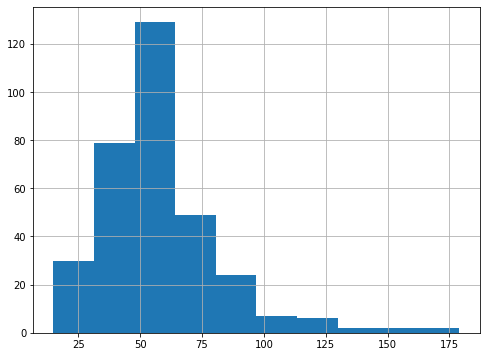

In [139]:
#Should hint to use a histogram, also let student know which dataframe to use
#Say don't use dfno but df 
df2['AdultWeekday'].hist(figsize = (8,6))
plt.show()

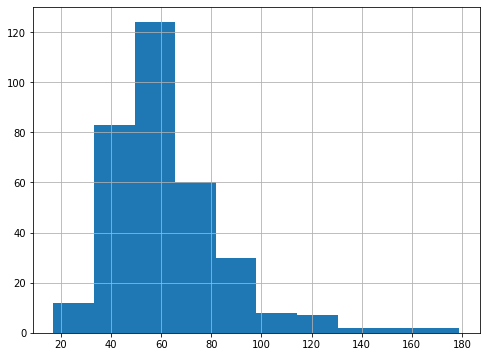

In [140]:
df2['AdultWeekend'].hist(figsize = (8,6))
plt.show()

<font color='teal'>**Review the `daysOpenLastYear`,`projecteDaysOpen` response variable distributions**</font>

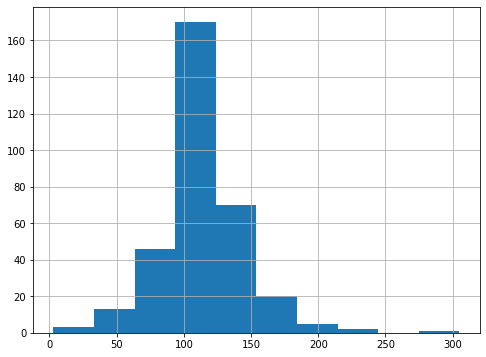

In [141]:
df2['daysOpenLastYear'].hist(figsize = (8,6))
plt.show()

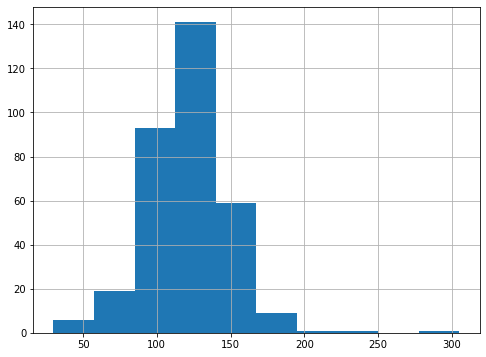

In [142]:
df2['projectedDaysOpen'].hist(figsize = (8,6))
plt.show()

After reviewing these respons varible distributions, there doesn't appear to be any data issues to mitigate. Now, we move on to investigating feature relationship and interactions between the features the response.

# Explore data relationships

<font color='teal'>**Create pairplots or what is commonly referred to as biplots**</font>

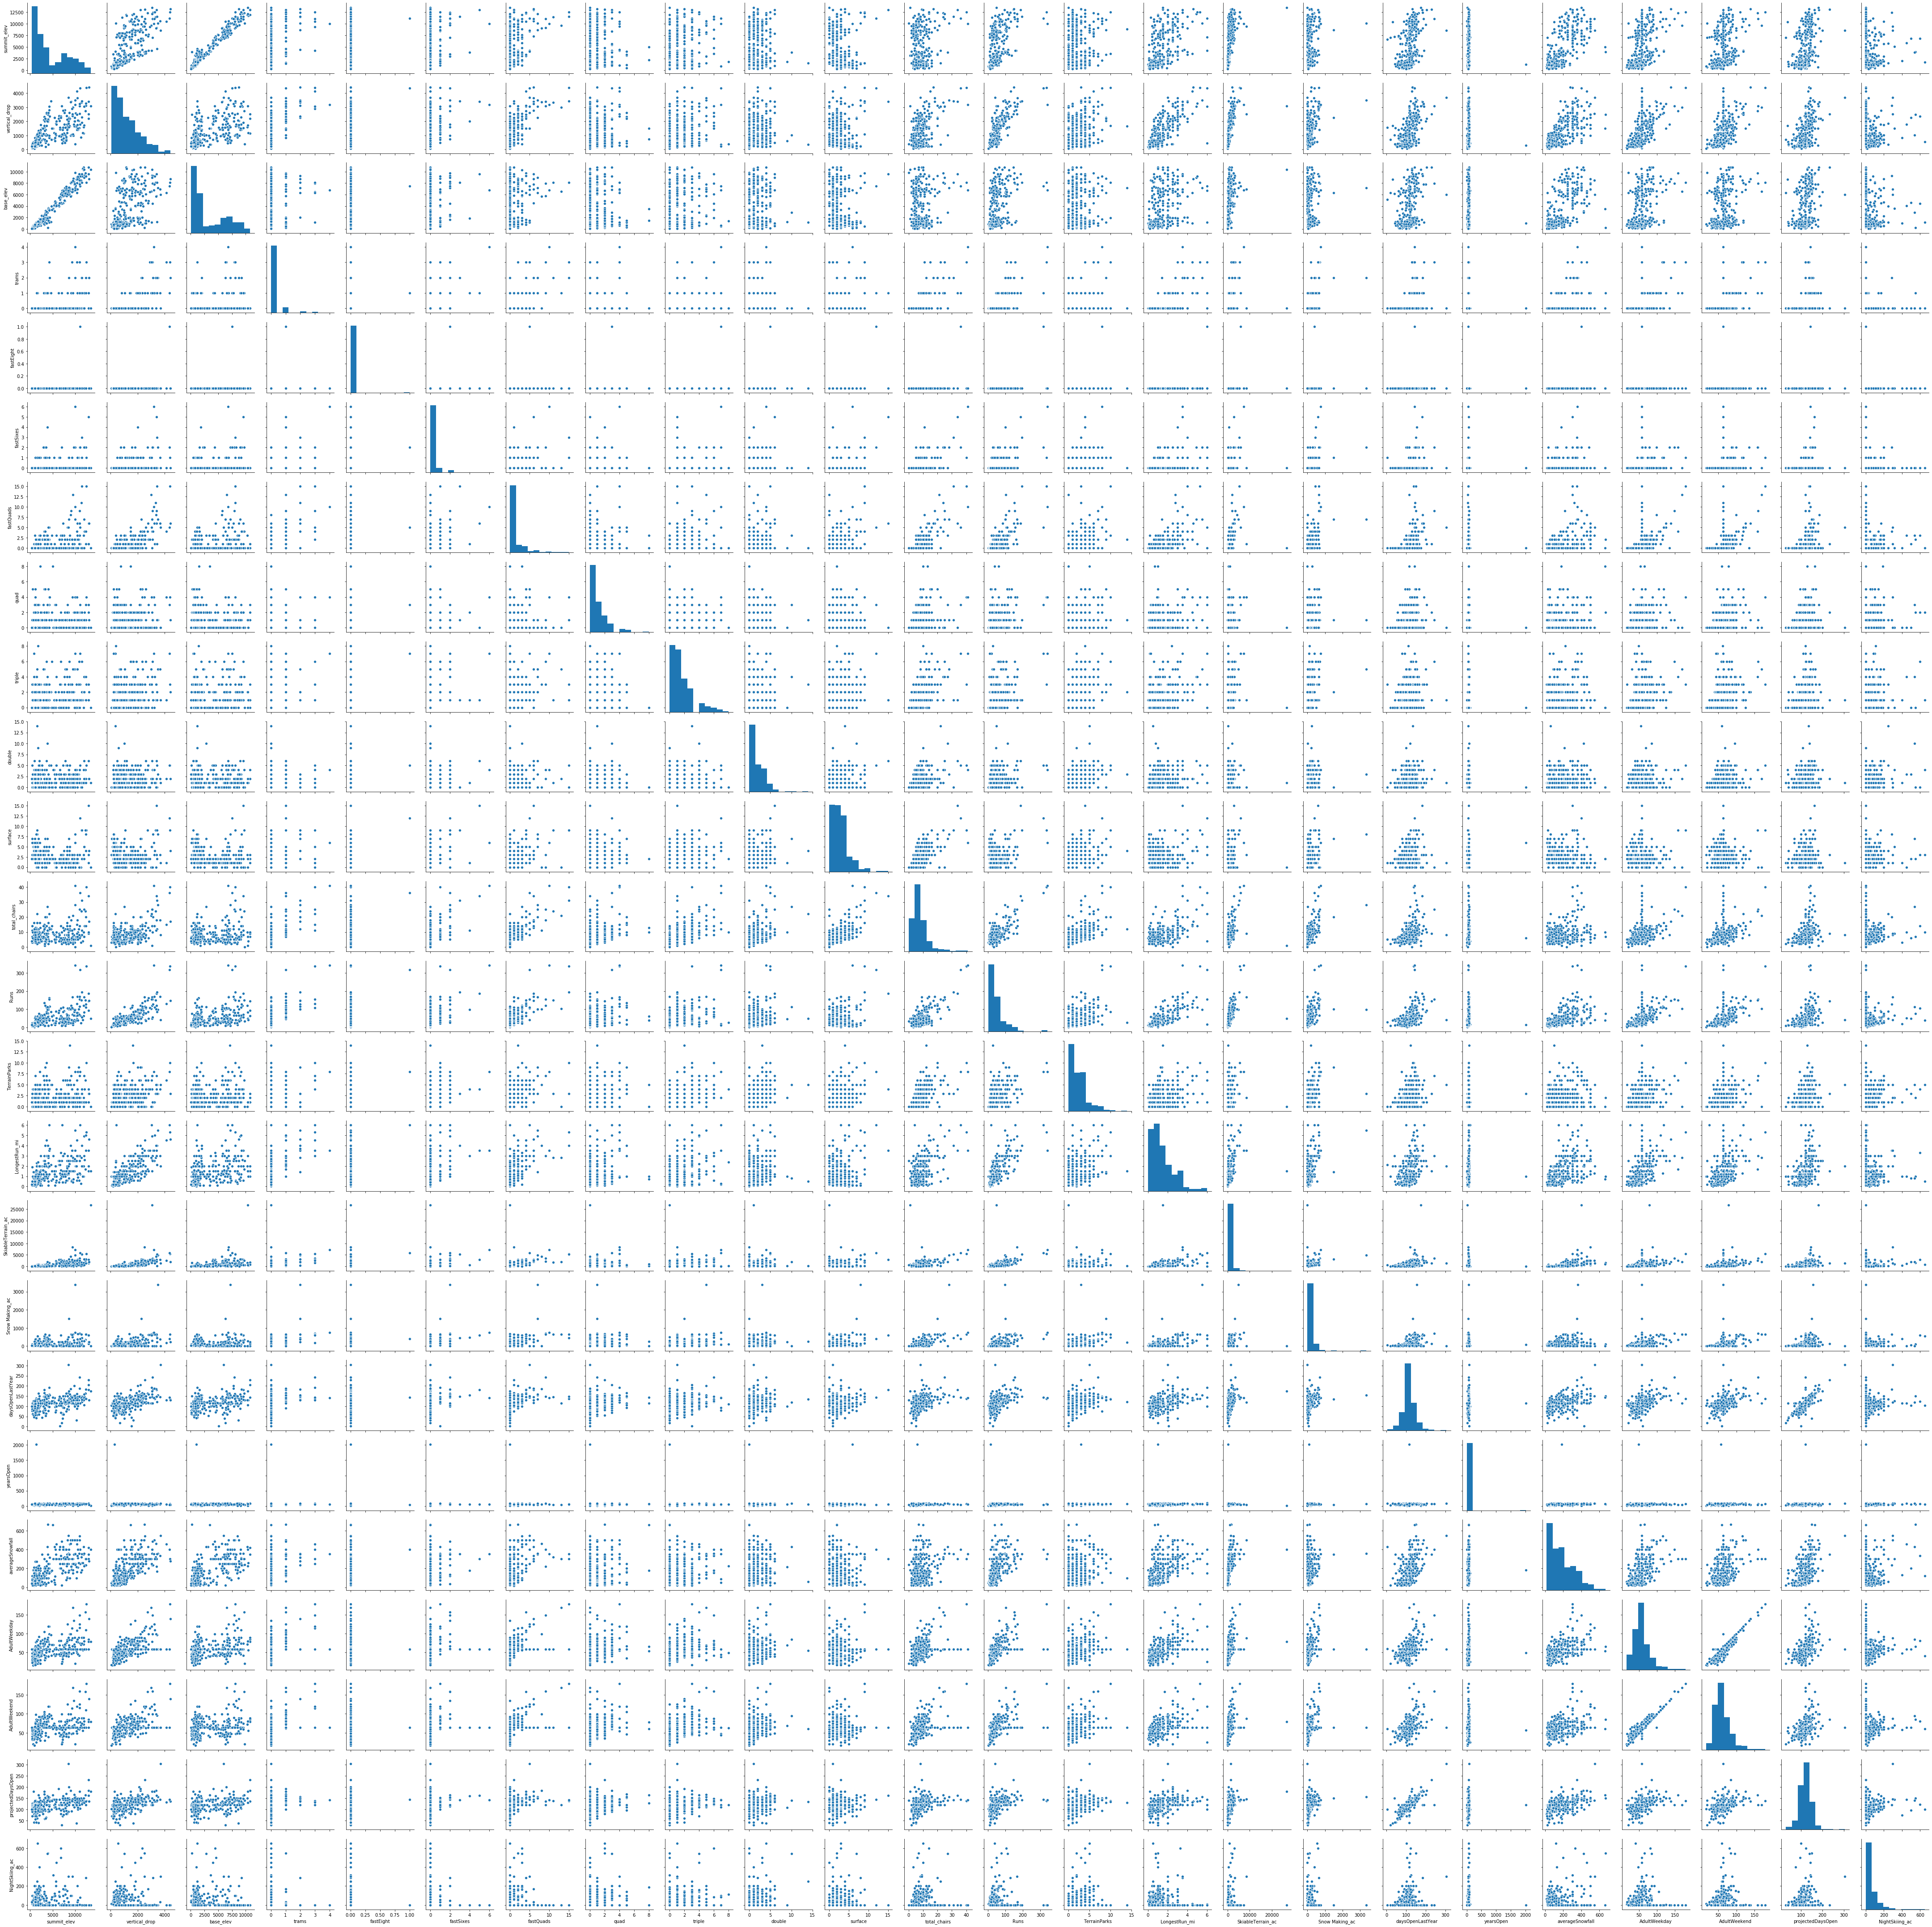

In [143]:
#pair plots
#again should say using seaborn to create a pairplot 
#https://seaborn.pydata.org/generated/seaborn.pairplot.html
#should also say which dataframe to use 
g = sns.pairplot(df2)
#This takes a long time to load...also with so many features this really isn't a great way
#to visualize the data 

# Identification and creation of features

<font color='teal'>**Create a Pearson correlation heatmap**</font>

In [144]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.round.html
corr = df2.corr()
corr.round(2).style.background_gradient(cmap='coolwarm')

When reviewing the Pearson correlation coefficient heat map you can see substantial differences in the correlations compared to the response variable(s) as well as in the features when compared to each other. The heatmap helps identify features that suffer from Multi-collinearity. 

<font color='teal'>**Use the correlation matrix displayed in the heatmap to select and remove collinear features. Remember to exclude the response variable(s) from the matrix to ensure they are retained in our final model development data set. Then select those features that are more than 95% correlated for removal.**</font>

In [145]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mask.html
#https://numpy.org/doc/1.18/reference/generated/numpy.eye.html
#not clear which one to remove? Summit or base elevation here? 
#Should tell student to remove base 
m = ~(corr.mask(np.eye(len(corr), dtype=bool)).abs() > 0.95).any()
unCorrelated = corr.loc[m, m]
unCorrelated.round(2).style.background_gradient(cmap='coolwarm')

In [147]:
#Lets say to drop base elevation 
#Set it to new dataframe in case 
df3 = df2.drop(columns = 'base_elev')
#check shape gain
df3.shape

(330, 25)

Now we address the feature creation piece of this step. We can create additional features through many methods such as: combining several features, grouping features into bins, or even by applying an unsupervised classification algorithm, such as Kmeans clustering and using the clusters as features in our model development dataset.

Run the next two cells below to create an Elbow plot. The Elbow plot is a diagnostic tool that helps you determine the number of clusters to include in your kmeans clustering implementation. In this example, the error between clusters and within clusters is compared for a range of 1 to 11 clusters, and it appears the elbow is between two and four, therefore we set the parameter k = 3.

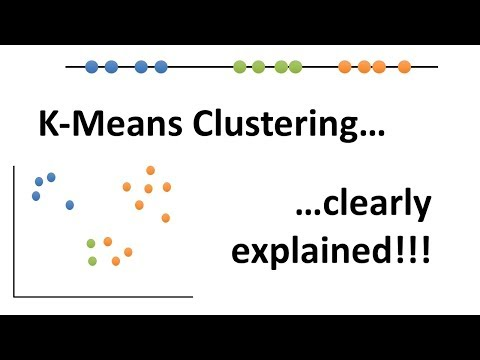

In [120]:
#Maybe put a video tutorial here 
from IPython.display import YouTubeVideo
YouTubeVideo('4b5d3muPQmA')

In [148]:
#no introduction to kmeans should include a video here 
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
from sklearn.cluster import KMeans
#should tell students which dataframe to use.  The one with 25 features 
x = df3.drop(['Name','state'], axis =1)

In [149]:
#make sure there are no more nulls 
x.isnull().sum()

summit_elev          0
vertical_drop        0
trams                0
fastEight            0
fastSixes            0
fastQuads            0
quad                 0
triple               0
double               0
surface              0
total_chairs         0
Runs                 0
TerrainParks         0
LongestRun_mi        0
SkiableTerrain_ac    0
Snow Making_ac       0
daysOpenLastYear     0
yearsOpen            0
averageSnowfall      0
AdultWeekday         0
AdultWeekend         0
projectedDaysOpen    0
NightSkiing_ac       0
dtype: int64

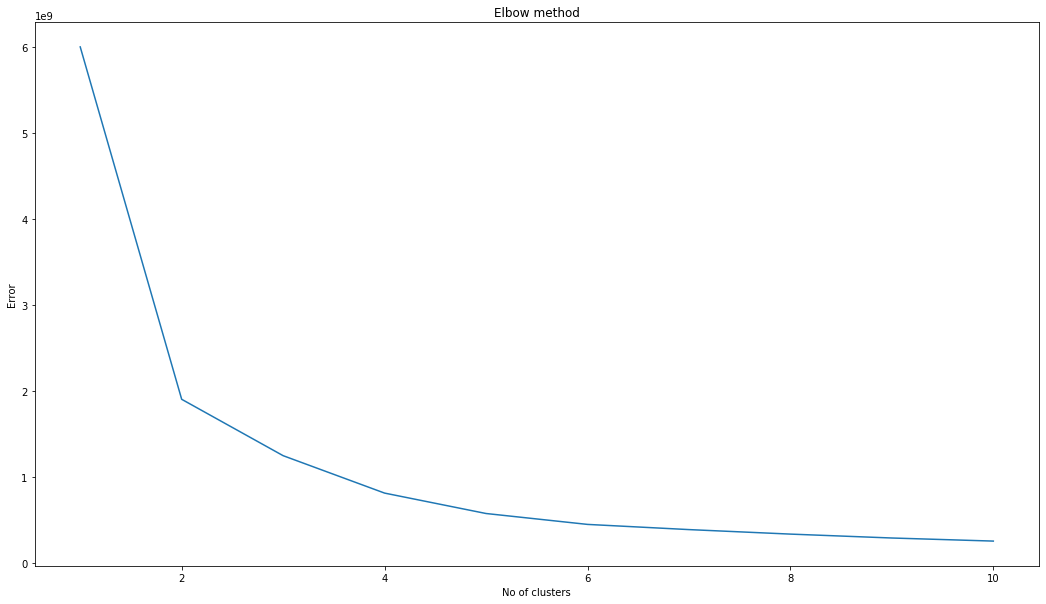

In [150]:
#https://intellipaat.com/community/1867/scikit-learn-k-means-elbow-criterion
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

<font color='teal'>**Fit the kmeans algorithm with the k parameter set to three and plot the results.**</font>

In [152]:
kmeans3 = KMeans(n_clusters = 3).fit(x)

<font color='teal'>**Add the clusters to your dataframe as a new column to include in the next step and write the updated dataframe out as csv. Save the dataframe in the data folder and name it `step3_output.csv`.**</font>

In [153]:
y_kmeans3 = kmeans3.predict(x)

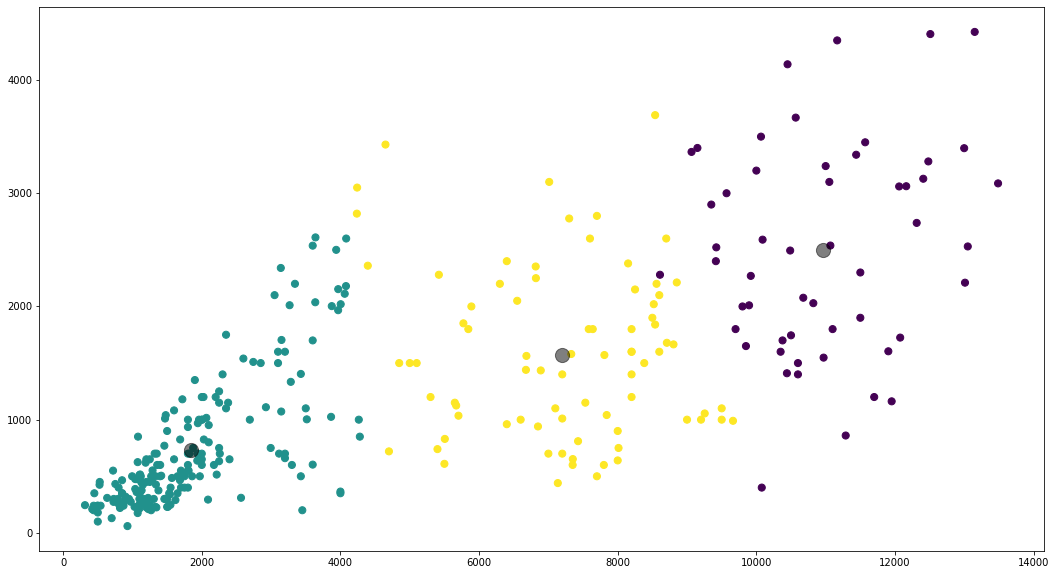

In [158]:
#slice slice problem 
#https://stackoverflow.com/questions/55291667/getting-typeerror-slicenone-none-none-0-is-an-invalid-key
#https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=y_kmeans3, s=50, cmap='viridis')

centers = kmeans3.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

In [162]:
#Save clusters as a feature 
df3['clusters']=y_kmeans3

In [163]:
#should ask students to look at the dataframe head and shape before next file
#Should explain that we clustered to label the customer into a cluster that's why we did 
#kmeans 
df3.head()

Name    state  summit_elev  vertical_drop  trams  fastEight  \
0       Alyeska Resort   Alaska         3939           2500      1        0.0   
1  Eaglecrest Ski Area   Alaska         2600           1540      0        0.0   
2     Hilltop Ski Area   Alaska         2090            294      0        0.0   
3     Arizona Snowbowl  Arizona        11500           2300      0        0.0   
4  Sunrise Park Resort  Arizona        11100           1800      0        0.0   

   fastSixes  fastQuads  quad  triple  ...  SkiableTerrain_ac  Snow Making_ac  \
0          0          2     2       0  ...             1610.0           113.0   
1          0          0     0       0  ...              640.0            60.0   
2          0          0     0       1  ...               30.0            30.0   
3          1          0     2       2  ...              777.0           104.0   
4          0          1     2       3  ...              800.0            80.0   

   daysOpenLastYear  yearsOpen  averageSnowfall  AdultWeekday  AdultWeekend  \
0             150.0       60.0            669.0          65.0          85.0   
1              45.0       44.0            350.0          47.0          53.0   
2             150.0       36.0             69.0          30.0          34.0   
3             122.0       81.0            260.0          89.0          89.0   
4             115.0       49.0            250.0          74.0          78.0   

   projectedDaysOpen  NightSkiing_ac  clusters  
0              150.0           550.0         1  
1               90.0             0.0         1  
2              152.0            30.0         1  
3              122.0             0.0         0  
4              104.0            80.0         0  

[5 rows x 26 columns]

In [164]:
df3.shape

(330, 26)

In [159]:
#make sure to save in the right folder 
os.getcwd()

'/Users/justin/Desktop/GuidedCapstone-master-2/Data/data'

In [165]:
#remind students to set index = false 
#let students know what shape the dataframe should be 
df3.to_csv('step3_output.csv',index=False)